# Seaborn Tutorial

## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Import Data

In [2]:
df = pd.read_csv('ComputerSales.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
car_crash = sns.load_dataset('car_crashes')
car_crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution Plots

**Distribution plot**

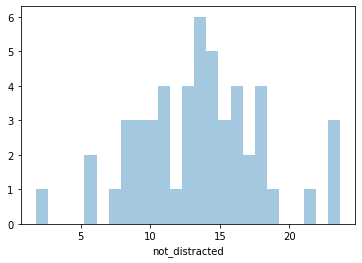

In [12]:
sns.distplot(car_crash['not_distracted'], kde=False, bins=25)

## Joint Plot

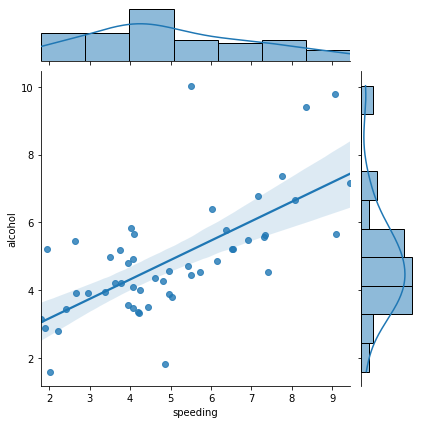

In [13]:
sns.jointplot(x='speeding', y='alcohol', data=car_crash, kind='reg');

## KDE Plot

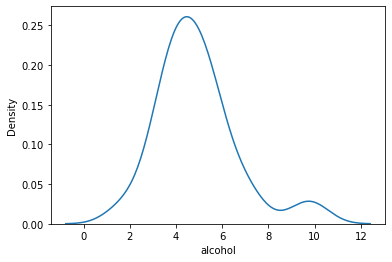

In [15]:
sns.kdeplot(car_crash['alcohol'])

## Pair Plots

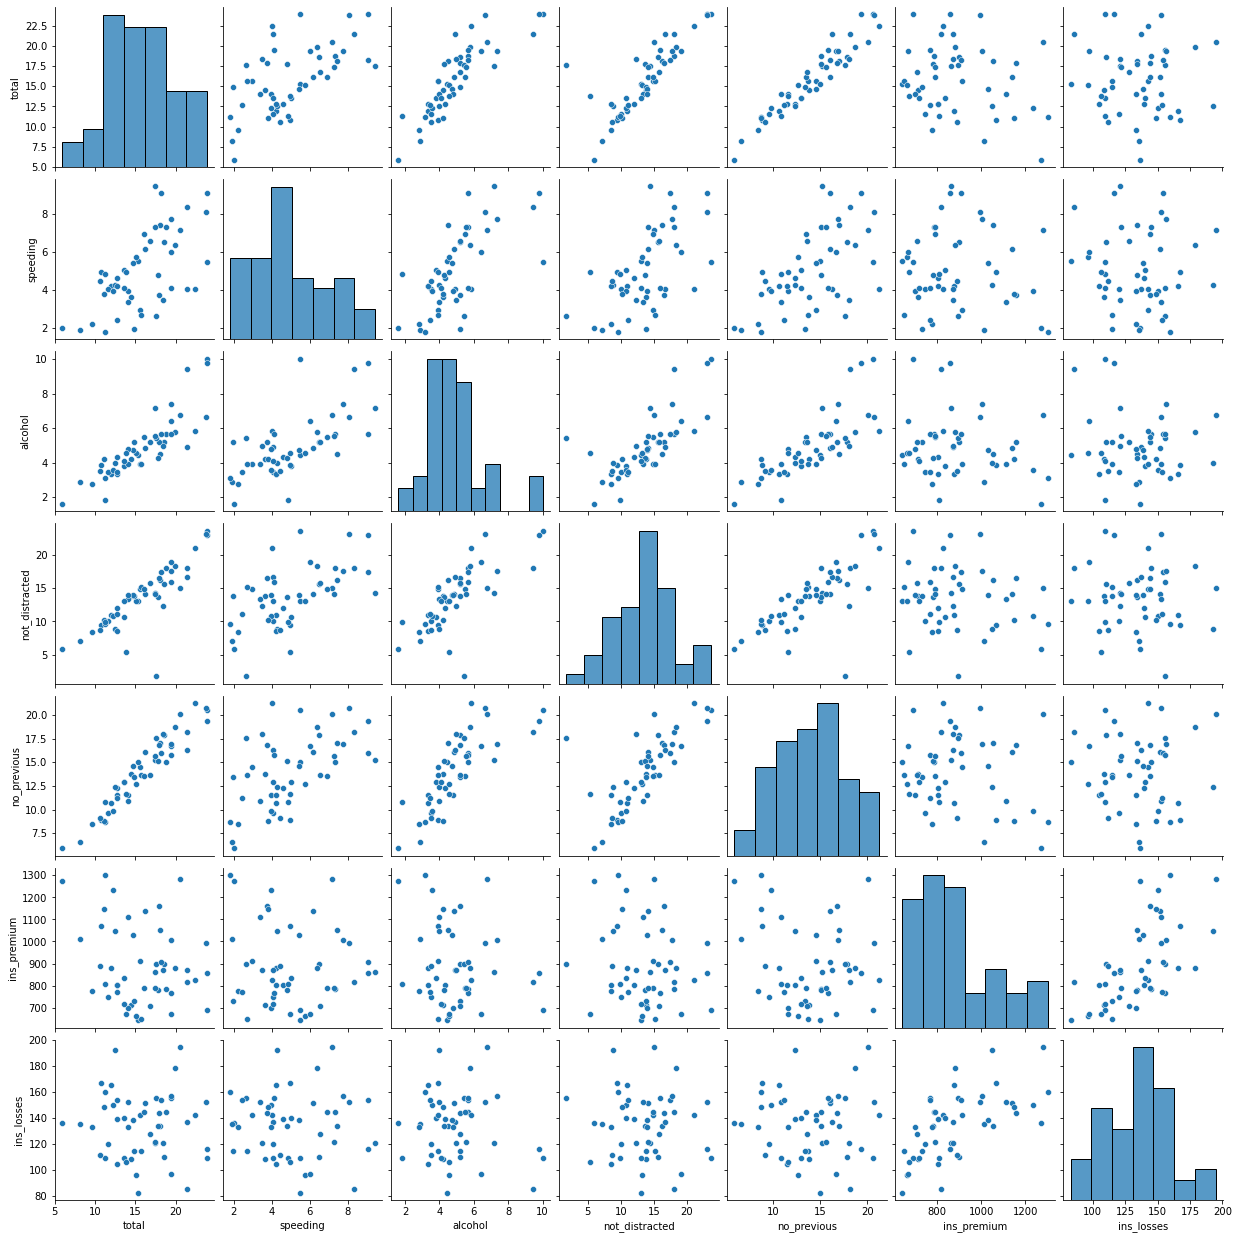

In [17]:
sns.pairplot(car_crash)

In [19]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


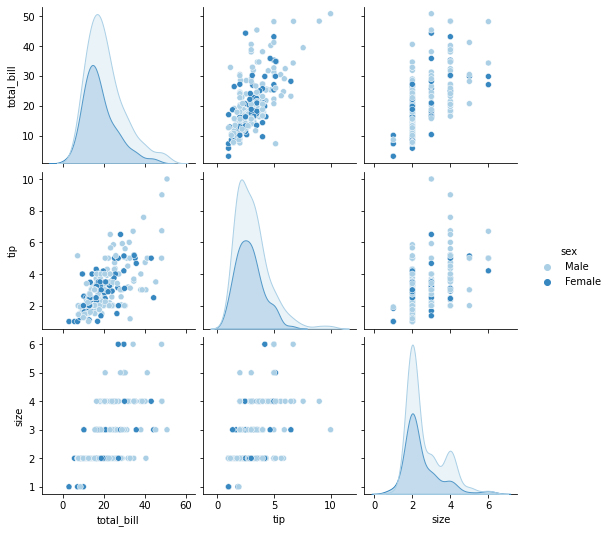

In [20]:
sns.pairplot(tips_df, hue='sex', palette='Blues')

## Rug Plot

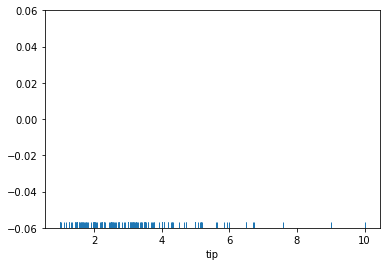

In [21]:
sns.rugplot(tips_df['tip'])

## Styling

<Figure size 720x432 with 0 Axes>

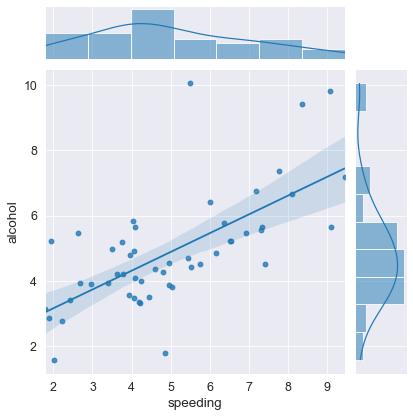

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.set_context('paper', font_scale=1.4)
sns.jointplot(x='speeding', y='alcohol', data=car_crash, kind='reg')
sns.despine(left=False, bottom=True)


# Categorical Plots

## Bar Plots

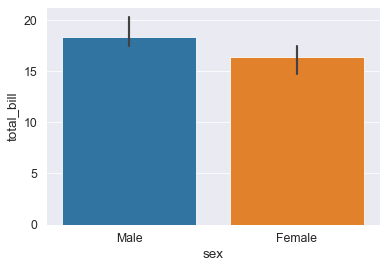

In [34]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

## Counter Plot

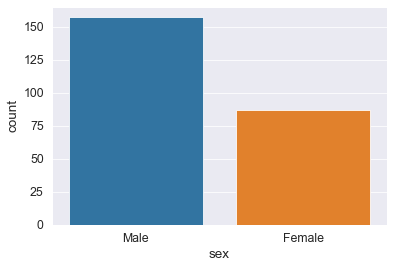

In [35]:
sns.countplot(x='sex', data=tips_df)

## Box Plot

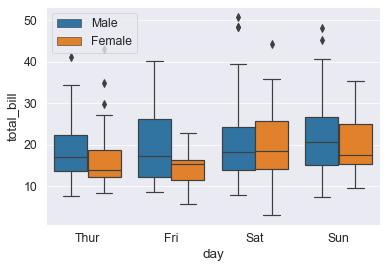

In [37]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

## Violin Plot

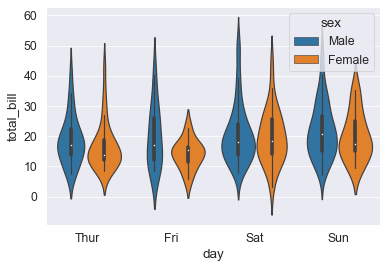

In [40]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

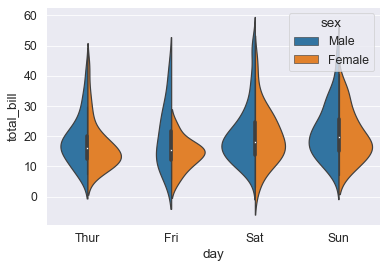

In [41]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

## Strip Plot

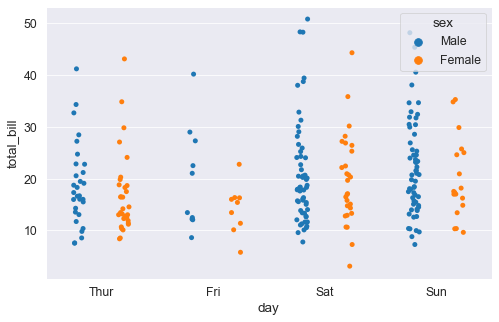

In [46]:
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)
# basically work like scatter plot

## Swarm Plot

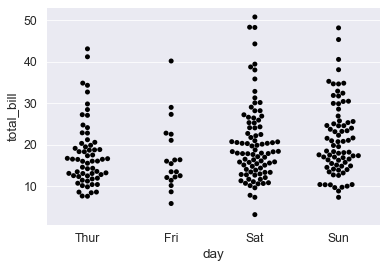

In [50]:
# Swarm plot is a between of strip and violin plot
#sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='black')

## Palettes

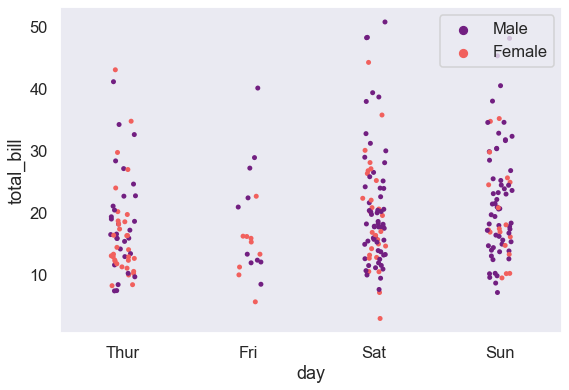

In [56]:
plt.figure(figsize=(9,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='magma')
plt.legend(loc=1) # o = upper left, 1 = upper right, 2 = bottom left, 3 = bottom right

# Matrix plot

## Heatmaps

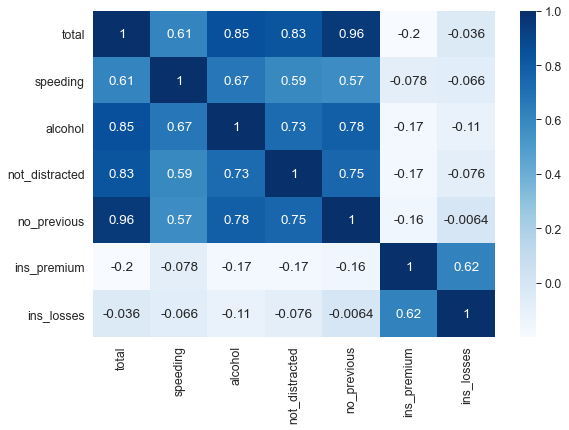

In [59]:
plt.figure(figsize=(9,6))
sns.set_context('paper', font_scale=1.4)
crash_mx = car_crash.corr()
crash_mx

sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [62]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


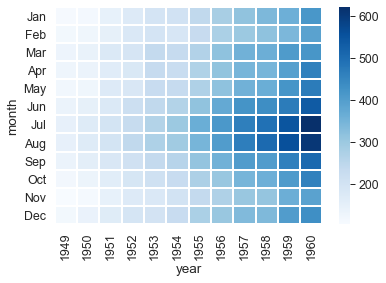

In [65]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidths=1)

## Cluster map

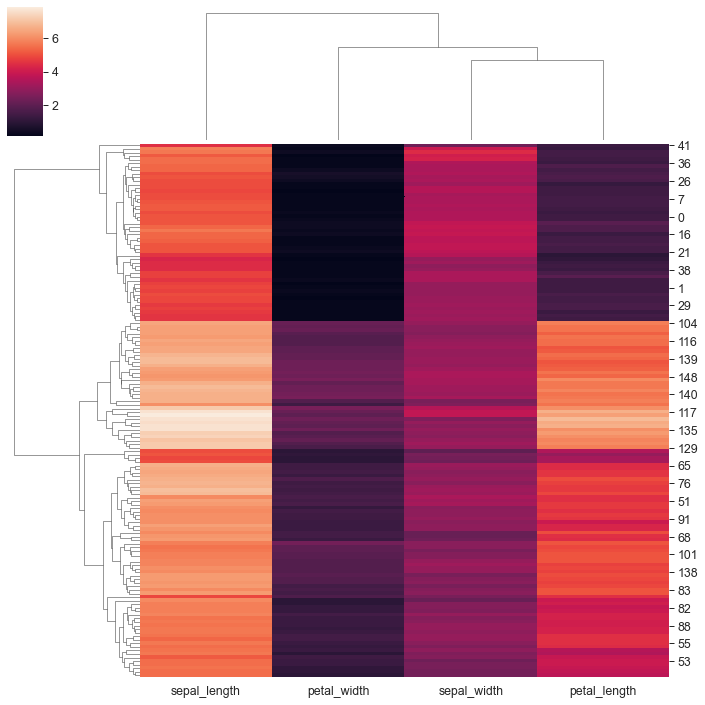

In [67]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)

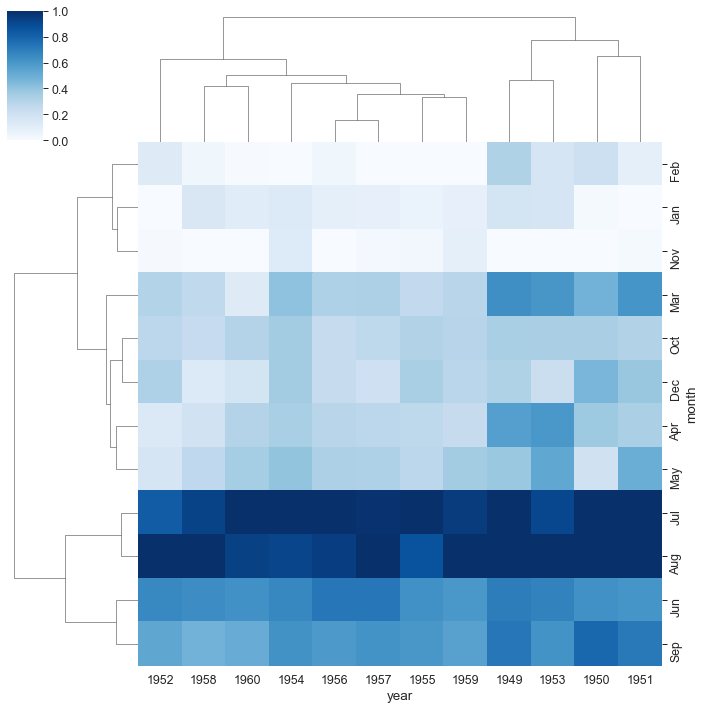

In [68]:
sns.clustermap(flights, cmap='Blues', standard_scale=1)

## Pair Grid

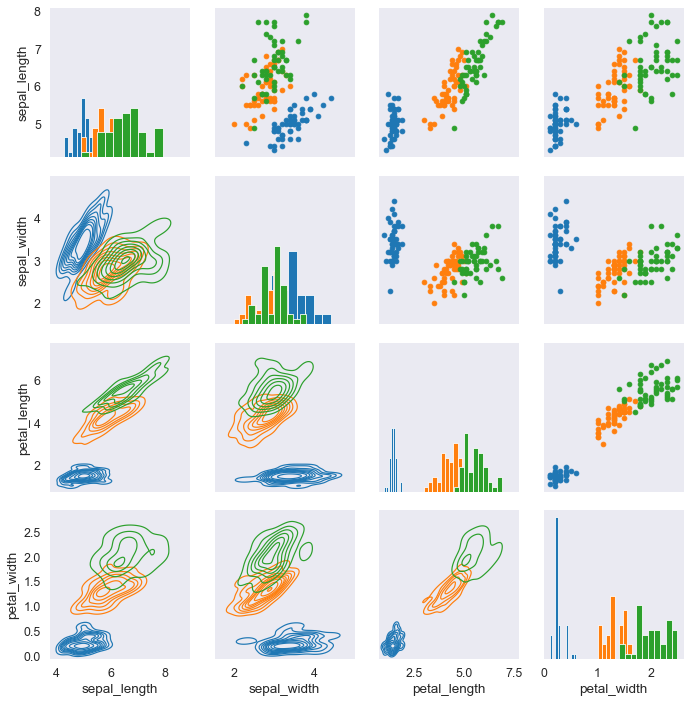

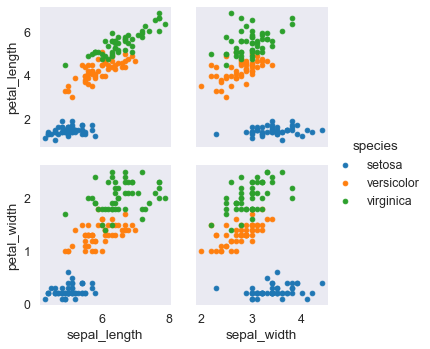

In [75]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
#iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris, hue='species', x_vars=['sepal_length', 'sepal_width'],
                                           y_vars=['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()
